In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("apple_sales_2024.csv")
df.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [3]:
df.shape

(1000, 7)

In [4]:
df.describe()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.444500,8.565880,5.555760,6.935500,12.447130
std,7.180077,3.735994,2.506491,2.951677,4.306347
min,5.030000,2.020000,1.010000,2.000000,5.010000
25%,11.447500,5.432500,3.470000,4.330000,8.710000
50%,17.130000,8.695000,5.550000,6.815000,12.205000
75%,23.715000,11.740000,7.730000,9.532500,16.252500
max,29.940000,14.990000,9.990000,12.000000,19.920000


In [5]:
df.isna().sum()

State                              0
Region                             0
iPhone Sales (in million units)    0
iPad Sales (in million units)      0
Mac Sales (in million units)       0
Wearables (in million units)       0
Services Revenue (in billion $)    0
dtype: int64

In [6]:
df = df[['State', 'Region', 'iPhone Sales (in million units)']]
df.rename(columns={'iPhone Sales (in million units)': 'iPhone_Sales'}, inplace=True)

In [7]:
df.head()

,State,Region,iPhone_Sales
0,Chongqing,Greater China,7.46
1,Germany,Europe,8.63
2,UK,Europe,5.61
3,Shanghai,Greater China,7.82
4,Thailand,Rest of Asia,16.70


In [8]:
region_sales = df.groupby('Region')['iPhone_Sales'].sum().sort_values(ascending=False)
print("Top 5 Regions by iPhone Sales:")
print(region_sales.head())

Top 5 Regions by iPhone Sales:
Region
Greater China    3868.28
Rest of World    3797.46
Europe           3563.12
North America    3124.14
Rest of Asia     3091.50
Name: iPhone_Sales, dtype: float64


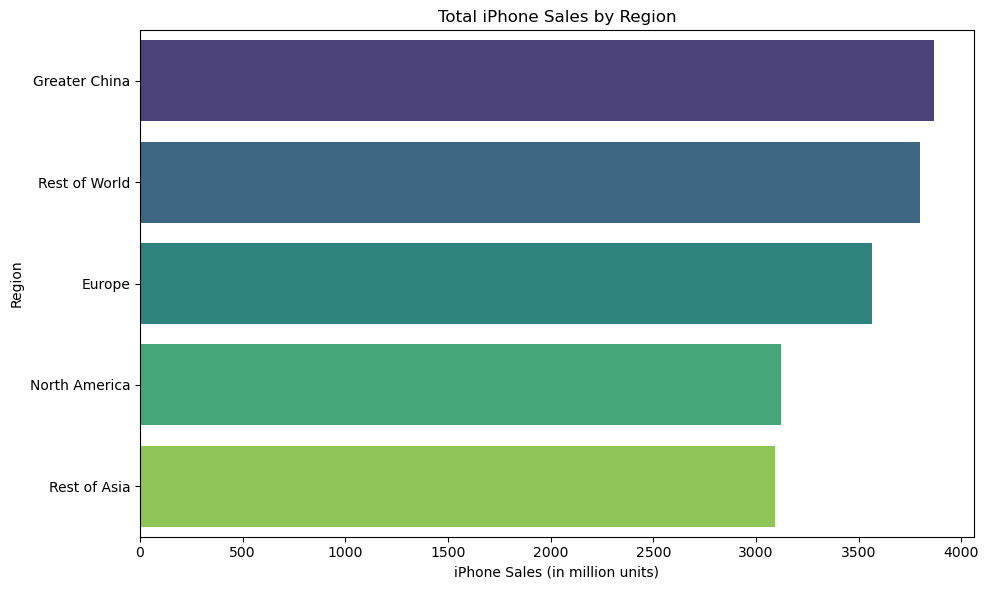

In [9]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='viridis')
plt.title('Total iPhone Sales by Region')
plt.xlabel('iPhone Sales (in million units)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

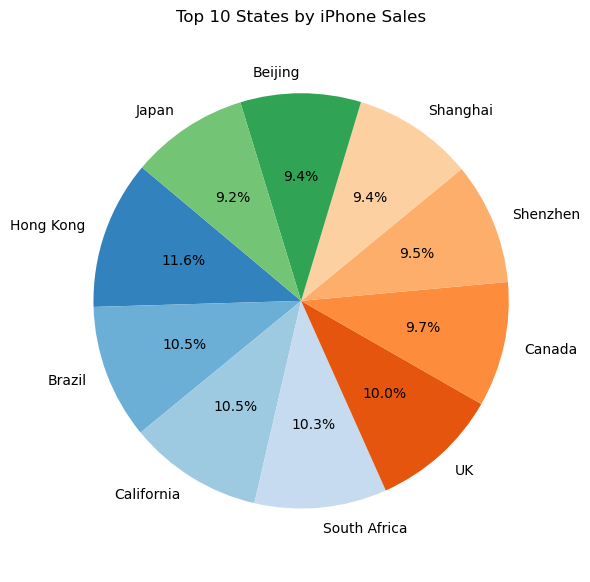

In [18]:
state_sales = df.groupby('State')['iPhone_Sales'].sum().sort_values(ascending=False)
top5 = state_sales.head(10)
plt.figure(figsize=(6, 6))
colors = plt.get_cmap('tab20c').colors
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 10 States by iPhone Sales')
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of iPhone Sales Across States')

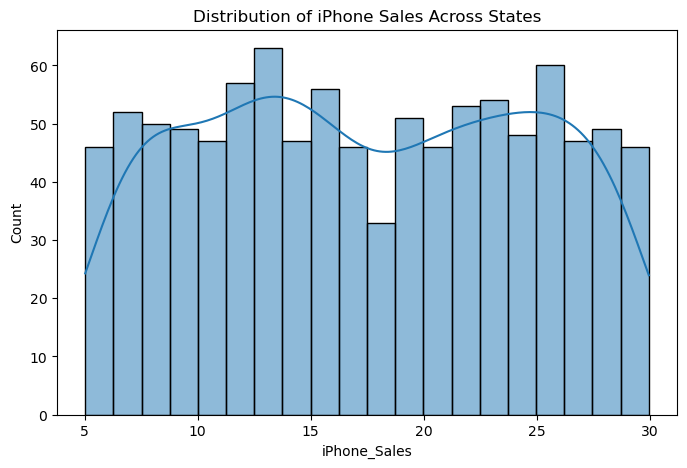

In [11]:
top_states = df.groupby('State')['iPhone_Sales'].sum().sort_values(ascending=False).head(10)
bottom_states = df.groupby('State')['iPhone_Sales'].sum().sort_values().head(10)
plt.figure(figsize=(8,5))
sns.histplot(df['iPhone_Sales'], bins=20, kde=True)
plt.title('Distribution of iPhone Sales Across States')

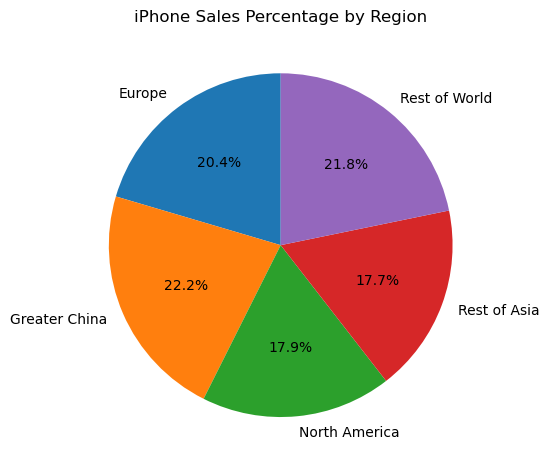

In [13]:
region_contrib = df.groupby('Region')['iPhone_Sales'].sum()
region_percent = region_contrib / region_contrib.sum() * 100

region_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('iPhone Sales Percentage by Region')
plt.ylabel('') 
plt.tight_layout()
plt.show()

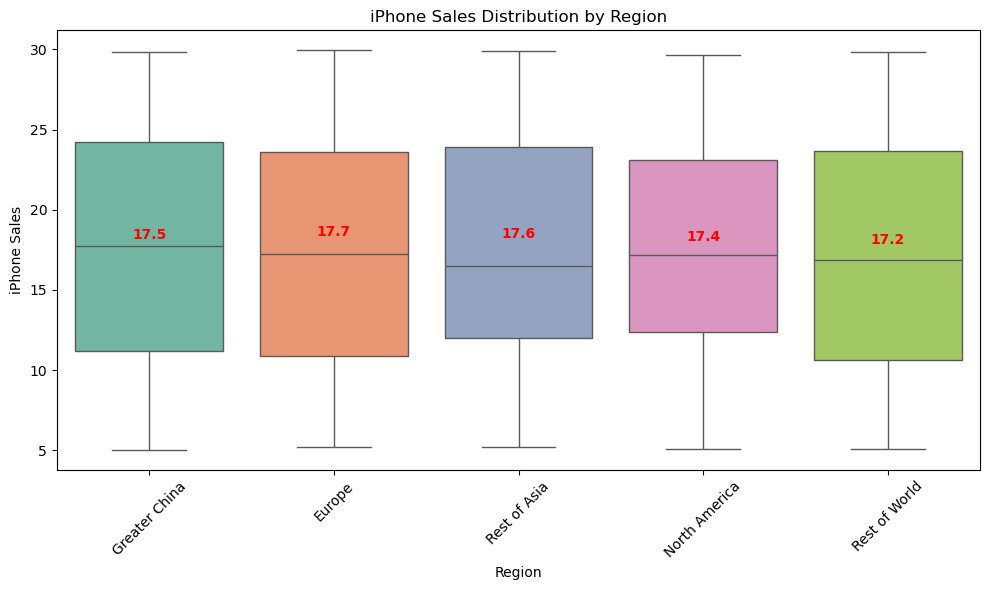

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Region', y='iPhone_Sales', palette='Set2')
avg_sales = df.groupby('Region')['iPhone_Sales'].mean()
for i, (region, avg) in enumerate(avg_sales.items()):
    plt.text(i, avg + 0.5, f'{avg:.1f}', ha='center', va='bottom', color='red', fontweight='bold')
plt.xticks(rotation=45)
plt.title('iPhone Sales Distribution by Region')
plt.ylabel('iPhone Sales')
plt.tight_layout()
plt.show()
